## Validation of Basic Optical Properties
This notebook will run a series of calculations to validate the transfer matrix routines
used to compute reflectivity, transmissivity, and emissivity as a function of wavelength and angle.


### Optical properties of noble metal films
#### Reflectivity, Transmissivity, and Emissivity vs wavelength for 50 nm gold

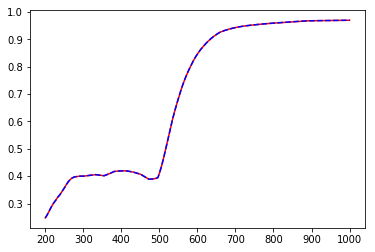

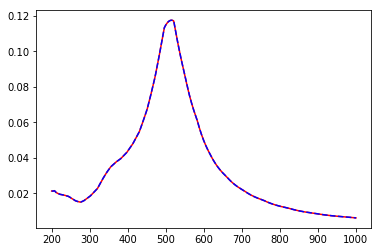

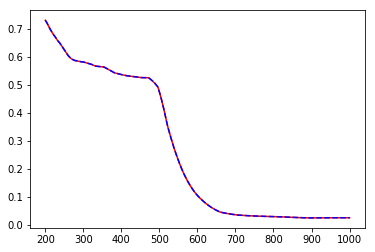

In [7]:
from wptherml.wpml import multilayer
from matplotlib import pyplot as plt
import numpy as np

''' In the following examples, we will compute the reflectivity, transmissivity, and absorptivity/emissivity
    of simple noble metal films.  Validation data was obtained using S. Byrnes tmm program, 
    which can be obtained from: https://github.com/sbyrnes321/tmm '''

### dictionary that stores basic properties 
### of the multilayer structure you want to simulate
structure = {
        ### computation mode - inline means the structure and calculation
        ### type will be determined from the values of this dictionary
        'mode': 'Inline',
        ### temperature of the structure - relevant for all thermal applications
        ### value is stored in attribute self.T
        'Temperature': 300,
        ### gold film with air above and belo
        'Material_List': ['Air', 'Au', 'Air'],
        ### gold film is 50 nm thick
        'Thickness_List': [0, 50e-9, 0],
         ### range of wavelengths optical properties will be calculated for
         ### values are stored in the array self.lam
        'Lambda_List': [200e-9, 1000e-9, 1000]
        }

gold_film = multilayer(structure)

### Read data obtained from S. Byrnes tmm program
validate_data = np.loadtxt('validation_data/50nm_Au_wl_scan.txt')
n_rows = len(validate_data)
valid_lam = np.zeros(n_rows)
valid_R = np.zeros_like(valid_lam)
valid_T = np.zeros_like(valid_lam)
valid_E = np.zeros_like(valid_lam)
### validate_data column 0 is the wavelength
### validate_data column 1 is the reflectivity
### validata_data column 2 is the transmissivity
### validate_data column 3 is the emissivity
for i in range(0,n_rows):
    valid_lam[i] = validate_data[i][0]
    valid_R[i] = validate_data[i][1]
    valid_T[i] = validate_data[i][2]
    valid_E[i] = validate_data[i][3]
    
### plot wptherml reflectivity with red lines, validation data with blue dashed lines
plt.plot(1e9*gold_film.lambda_array, gold_film.reflectivity_array, 'red')
plt.plot(1e9*valid_lam, valid_R, 'b--')
plt.show()

### plot wptherml transmissivity with red lines, validation data with blue dashed lines
plt.plot(1e9*gold_film.lambda_array, gold_film.transmissivity_array, 'red')
plt.plot(1e9*valid_lam, valid_T, 'b--')
plt.show()

### plot wptherml emissivity with red lines, validation data with blue dashed lines
plt.plot(1e9*gold_film.lambda_array, gold_film.emissivity_array, 'red')
plt.plot(1e9*valid_lam, valid_E, 'b--')
plt.show()

#### Reflection vs angle for 50 nm gold atop semi-infinite glass at $\lambda = 616 nm$

[[1.45      +0.        j 1.45      +0.        j 1.45      +0.        j
  ... 1.45      +0.        j 1.45      +0.        j
  1.45      +0.        j]
 [1.32998189+1.25535168j 1.32996933+1.26071948j 1.32996833+1.26603646j
  ... 0.22807023+6.47636355j 0.22850926+6.48327327j
  0.22894829+6.49018298j]
 [1.        +0.        j 1.        +0.        j 1.        +0.        j
  ... 1.        +0.        j 1.        +0.        j
  1.        +0.        j]]


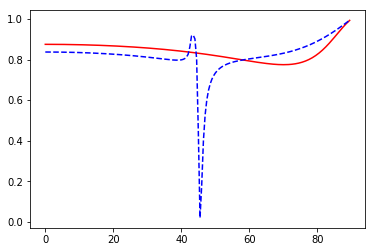

In [9]:
### first we can just modify the previous gold_film object to have a glass substrate layer.
### the validation data assumed n = 1.45 for a wavelengths of glass, so we will do so here as well.
gold_film.layer_static_ri(0, 1.45+0j)
print(gold_film.n)

### use the angular_fresnel method of the multilayer class to compute 
### the reflectivity vs angle for the gold_slab structure at a specified wavelength (in SI units)
gold_film.angular_fresnel(616e-9)

### read validation data generated by S. Byrnes tmm code
validate_data = np.loadtxt('validation_data/50nm_Au_theta_scan.txt')
n_rows = len(validate_data)
valid_theta = np.zeros(n_rows)
valid_R = np.zeros_like(valid_theta)

### validate_data column 0 is the angle in degrees
### validate_data column 1 is the reflectivity
for i in range(0,n_rows):
    valid_theta[i] = validate_data[i][0]
    valid_R[i] = validate_data[i][1]

plt.plot(gold_film.theta_array*180./np.pi, gold_film.r_vs_theta, 'red')
plt.plot(valid_theta, valid_R, 'b--')
plt.show()

#### Reflectivity, Transmissivity, and Emissivity vs angle for 50 nm gold at $\lambda = 616 nm$

### Optical properties of Critically-Coupled Stack

In [ ]:
''' In this example we will reproduce the emissivity, reflectivity, and transmissivity 
    of the structure illustrated in Figure 3 of Adv. Energy Mater. 2018, 1801035 '''

### dictionary that stores basic properties 
### of the multilayer structure you want to simulate

structure = {
        ### computation mode - inline means the structure and calculation
        ### type will be determined from the values of this dictionary
        'mode': 'Inline',
        ### temperature of the structure - relevant for all thermal applications
        ### value is stored in attribute self.T
        'Temperature': 1700,
        ### initial material list will be *almost* what we want to model to 
        ### reproduce Fig. 3... we will need to make layer 1 an alloy after instantiation
        ### and give the RIs static values, as was done in the AEM paper
        'Material_List': ['Air', 'Al2O3', 'SiO2', 'TiO2', 'SiO2', 'Al2O3', 'W', 'Air'],
        ### these are the thicknesses of the structure in Fig. 3
        'Thickness_List': [0, 20e-9, 255e-9, 150e-9, 255e-9, 10e-9, 900e-9, 0],
         ### range of wavelengths optical properties will be calculated for
         ### values are stored in the array self.lam
        'Lambda_List': [400e-9, 6000e-9, 1000]
        }

### create the instance called glass_slab
fig_3 = multilayer(structure)
### make layer 1 an alloy of alumina and W where volume fraction
### of W is 0.75
fig_3.layer_alloy(1, 0.75, 1.66+0j, 'W', 'MaxwellGarnett')

### make all dielectric layers have fixed RI
fig_3.LayerStaticRI(2, 1.45+0j)
fig_3.LayerStaticRI(3, 2.10+0j)
fig_3.LayerStaticRI(4, 1.45+0j)
fig_3.LayerStaticRI(5, 1.66+0j)


### recompute all Fresnel properties now that we have an alloy layer
fig_3.Fresnel()

### read validation data... this data was generated with the tmm program writen by S. Byrnes 
### using the RI and geometry data as described in Adv. Energy Mater. 2018, 1801035
### S. Byrnes tmm program can be obtained from: https://github.com/sbyrnes321/tmm
validate_data = np.loadtxt('validation_data/AEM_Fig3.txt')

n_rows = len(validate_data)
valid_lam = np.zeros(n_rows)
valid_R = np.zeros_like(valid_lam)
valid_T = np.zeros_like(valid_lam)
valid_E = np.zeros_like(valid_lam)
### validate_data column 0 is the wavelength
### validate_data column 1 is the reflectivity
### validata_data column 2 is the transmissivity
### validate_data column 3 is the emissivity
for i in range(0,n_rows):
    valid_lam[i] = validate_data[i][0]
    valid_R[i] = validate_data[i][1]
    valid_T[i] = validate_data[i][2]
    valid_E[i] = validate_data[i][3]
    

    



Upon instantiation, the basic optical properties (reflectivity, transmissivity, absorptivity/emissivity) are computed using the method $self.Fresnel()$ and stored as attributes $self.Reflectivity$, $self.Transmissivity$, $self.Emissivity$.  We will plot them as a function 
of wavelength in nanometers using pyplot in the following lines.  Note that we store all quantities in SI units, so we will multiply all values of $self.lam$ by $10^9 nm/m$ to convert the wavelengths to nanometers.

In [ ]:
### Plot wptherml R vs validation R
plt.plot(fig_3.lam*1e9, fig_3.Reflectivity, 'blue', valid_lam*1e9, valid_R, 'r--')
plt.show()

### Plot wptherml T vs validation T
plt.plot(fig_3.lam*1e9, fig_3.Transmissivity, 'blue', valid_lam*1e9, valid_T, 'r--')
plt.show()

### Plot wptherml E vs validation E
plt.plot(fig_3.lam*1e9, fig_3.Emissivity, 'blue', valid_lam*1e9, valid_E, 'r--')
plt.show()


We can also call a method called $AmbientColor$ to render the color of this structure.

### Optical properties of a gold film on a glass substrate
Let's create a new instance of the  50 nm layer of gold deposite on glass with air above.
Unlike the glass film, this structure will exhibit absorption.


In [ ]:
structure["Material_List"] = ['SiO2', 'Au', 'Air']
structure["Thickness_List"] = [0, 50e-9, 0]
structure["Lambda_List"] = [400e-9, 800e-9, 2000]

gold_glass = multilayer(structure)


### Plot reflectivity with a red line
plt.plot(gold_glass.lam*1e9, gold_glass.Reflectivity, 'red')
### Plot transmissivity with a blue line
plt.plot(gold_glass.lam*1e9, gold_glass.Transmissivity, 'blue')
### Plot absorptivity/emissivity with a black line
plt.plot(gold_glass.lam*1e9, gold_glass.Emissivity, 'black')

If we again look at the angular dependence of the reflection, we can see the
characteristic reflection dip associated with Kretschmann-Raether excitation of surface waves.

In [ ]:
gold_glass.angular_fresnel(600e-9)
plt.plot(180/np.pi*gold_glass.theta_array, gold_glass.r_vs_theta, 'red')
plt.show()